### Goal: Create a Dashboard using Facebook leads and campaigns data from a kaggle data set and analyze campaigns with best recommmended changes to improve conversion rates across products. 

[Dataset Link](https://www.kaggle.com/loveall/clicks-conversion-tracking)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
data = pd.read_csv("KAG_conversion_data.csv")
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


## Data Dictionary

The data used in this project is from an anonymous organisation’s social media ad campaign. The file contains 1143 observations in 11 variables. Below are the descriptions of the variables:

1.) **ad_id**: an unique ID for each ad.

2.) **xyzcampaignid**: an ID associated with each ad campaign of XYZ company.

3.) **fbcampaignid**: an ID associated with how Facebook tracks each campaign.

4.) **age**: age of the person to whom the ad is shown.

5.) **gender**: gender of the person to whim the add is shown

6.) **interest**: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) **Impressions**: the number of times the ad was shown.

8.) **Clicks**: number of clicks on for that ad.

9.) **Spent**: Amount paid by company xyz to Facebook, to show that ad.

10.) **Total conversion**: Total number of people who enquired about the product after seeing the ad.

11.) **Approved conversion**: Total number of people who bought the product after seeing the ad.

In [4]:
#Lets rename the columns with simpler labels
data.rename(columns = {'xyz_campaign_id': 'xyzCampId',
                       'fb_campaign_id': 'fbCampId',
                       'Impressions': 'impr',
                       'Total_Conversion': 'conv',
                       'Approved_Conversion': 'appConv',
                       'Clicks': 'clicks',
                       'Spent': 'spent'}, inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ad_id      1143 non-null   int64  
 1   xyzCampId  1143 non-null   int64  
 2   fbCampId   1143 non-null   int64  
 3   age        1143 non-null   object 
 4   gender     1143 non-null   object 
 5   interest   1143 non-null   int64  
 6   impr       1143 non-null   int64  
 7   clicks     1143 non-null   int64  
 8   spent      1143 non-null   float64
 9   conv       1143 non-null   int64  
 10  appConv    1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [6]:
df = data.copy()

In [46]:
df['interest'] = df['interest'].astype(object) #since 'interest' is a categorical variable

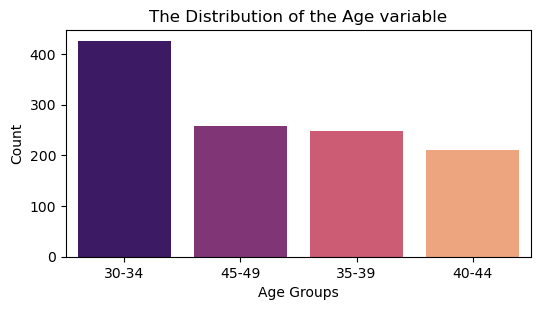

In [16]:
#Plotting the distribution of the age variable
age = df['age'].value_counts()

plt.figure(dpi = 100, figsize = (6,3))
sns.barplot(x = age.index, y = age.values, palette = 'magma')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title("The Distribution of the Age variable")
plt.show()

As you can clearly see the **30-34** age group has the most number of people (above 400) our ads have targetted.

In [29]:
# defining a Color Map
cmap = plt.get_cmap('Pastel1') 
my_colors = cmap(np.arange(10))

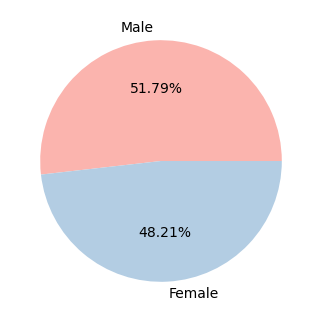

In [44]:
#The proportion of the Gender Variable
gender = df.gender.value_counts()
plt.figure(dpi = 100)
plt.pie(gender, labels = ['Male', 'Female'],
        autopct = "%.2f%%", colors = my_colors)
plt.show()

Clearly as far as our target audience is concerned it's almost an even split between men and women, although the number of men is slightly greater than women.

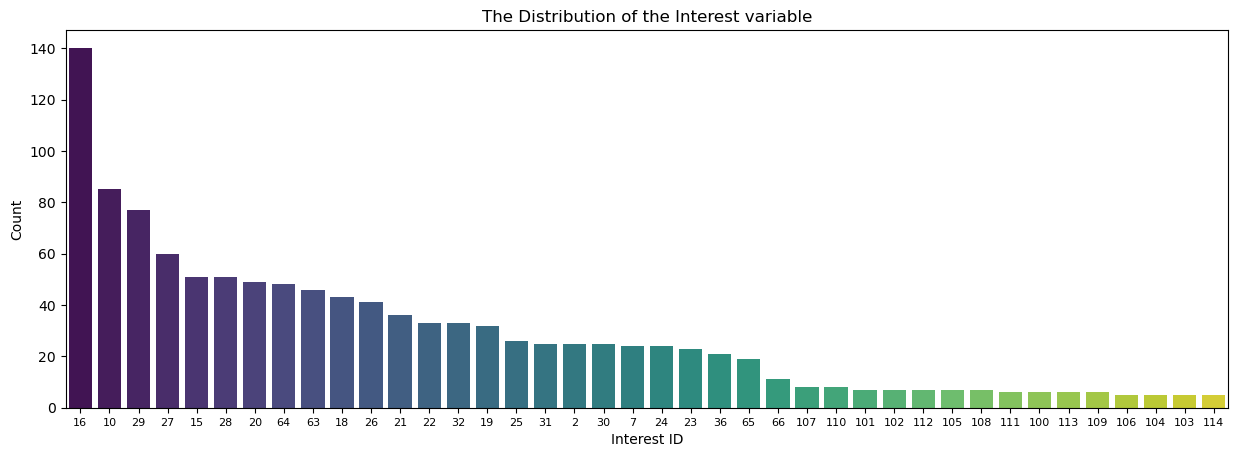

In [75]:
#Plotting the distribution of the interest variable
interest = df['interest'].sort_values(ascending = False).value_counts()

plt.figure(dpi = 100, figsize = (15,5))
sns.barplot(x = interest.index, y = interest.values, palette = 'viridis', order = interest.index)
plt.xlabel('Interest ID')
plt.xticks(fontsize = 8)
plt.ylabel('Count')
plt.title("The Distribution of the Interest variable")
plt.show()

As you can see, the interest '16' has been targetted by close to 140 advertisements!

In [89]:
def distribution(data ,var):
  plt.figure(figsize = (len(var)*6,6), dpi = 120)
  for j,i in enumerate(var):
    plt.subplot(1,len(var),j+1)
    plt.hist(data[i], bins = 10)
    plt.title(i)

In [90]:
columns = ['impr', 'clicks', 'spent']

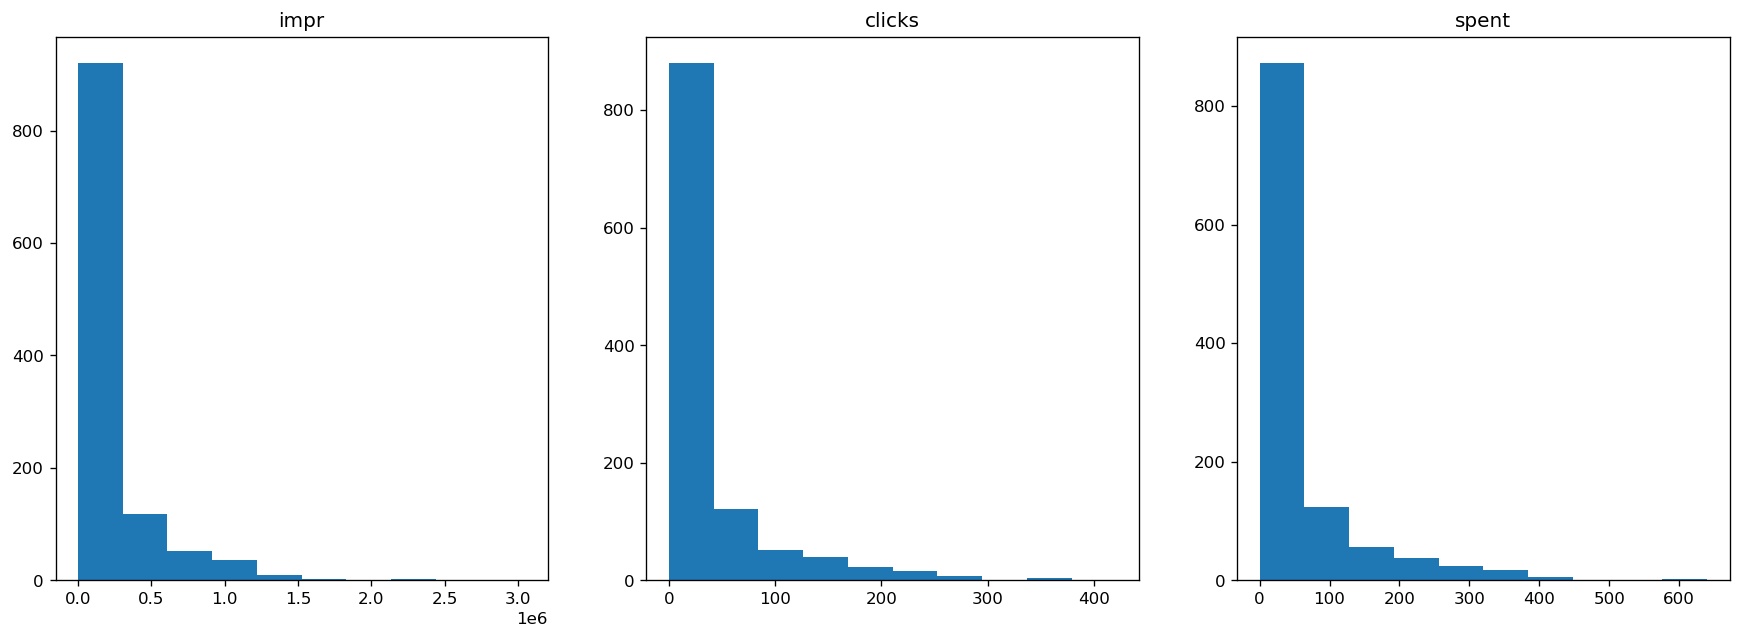

In [91]:
distribution(df, columns)

As you can see, for a majority of out ads, we are getting around 250,000 impressions, 50 clicks and spending about 50 pounds for the same.

In [93]:
df['ctr'] = (df['clicks']/df['impr']) * 100  #click through rate: Number of Clicks per Impression
df['cpc'] = (df['spent']/df['clicks']) #Cost Per Click: Amount we spend per click

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ad_id      1143 non-null   int64  
 1   xyzCampId  1143 non-null   int64  
 2   fbCampId   1143 non-null   int64  
 3   age        1143 non-null   object 
 4   gender     1143 non-null   object 
 5   interest   1143 non-null   object 
 6   impr       1143 non-null   int64  
 7   clicks     1143 non-null   int64  
 8   spent      1143 non-null   float64
 9   conv       1143 non-null   int64  
 10  appConv    1143 non-null   int64  
 11  ctr        1143 non-null   float64
 12  cpc        936 non-null    float64
dtypes: float64(3), int64(7), object(3)
memory usage: 116.2+ KB


In [97]:
df[df['cpc'].isna()][['clicks', 'spent', 'cpc']]

,clicks,spent,cpc
2,0,0.0,NaN
5,0,0.0,NaN
10,0,0.0,NaN
11,0,0.0,NaN
12,0,0.0,NaN
...,...,...,...
719,0,0.0,NaN
851,0,0.0,NaN
880,0,0.0,NaN
882,0,0.0,NaN


As you can see, we have some null values for 'cpc' variable. This is because, both the number of clicks and spent amount for these advertisements is zero. Let's replace these Null values with zero!

In [99]:
df.fillna(0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ad_id      1143 non-null   int64  
 1   xyzCampId  1143 non-null   int64  
 2   fbCampId   1143 non-null   int64  
 3   age        1143 non-null   object 
 4   gender     1143 non-null   object 
 5   interest   1143 non-null   int64  
 6   impr       1143 non-null   int64  
 7   clicks     1143 non-null   int64  
 8   spent      1143 non-null   float64
 9   conv       1143 non-null   int64  
 10  appConv    1143 non-null   int64  
 11  ctr        1143 non-null   float64
 12  cpc        1143 non-null   float64
dtypes: float64(3), int64(8), object(2)
memory usage: 116.2+ KB


Next we will try to see how our KPI's are correlated with out spent and conversion numbers(conv & appConv)


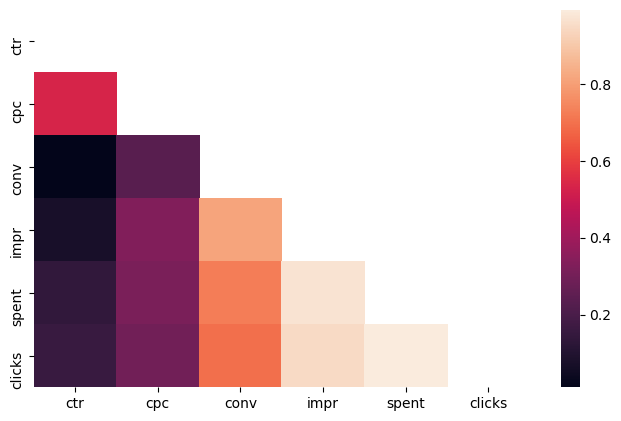

In [105]:
# create a subset of our dataset
datatrim = df[['ctr', 'cpc', 'conv', 'impr', 'spent', 'clicks']]

plt.figure(dpi = 100, figsize = (8,5))
sns.heatmap(datatrim.corr(), mask = np.triu(np.ones_like(datatrim.corr())));

As we can see, there is a clear correlation between the amount of money we spend and the number of impressions, clicks and conversions.

So as per this dataset, it seems like the more we spend the more revenue we generate.

### When it comes such campaign datasets, we can ask a lot of questions and gain a lot of insights. But to what end?

Without understanding a company's marketing strategy or campaign objective, it can be very difficult to ascertain what KPI's to look for. For instance, if a company is more interested in generating buzz about their new product or increase their brand awareness, their marketing team may be more interested in increasing the number of `impressions` and less concerned with the revenue generation.

In our case, we will assume that the company 'XYZ's marketing team is interested in generating conversions and increasing revenue.

To this end, the KPI's we'll focus on are ROAS, Total Conversion Numbers, Total Conversion Value & Cost per Conversion.

#### Note: We will assume that an enquiry (Total conversion, conv) is worth £5, and a sale (Approved conversion, appConv), is worth £100. 

In [106]:
#total conversion value - conversion to enquiry + conversion to actual sale
df['totConv'] = df['conv'] + df['appConv']

In [107]:
# Cost Per Conversion - i.e The value of each conversion
df['costPerConv'] = df['spent']/df['totConv']

In [108]:
# Conversion Values
df['totConVal'] = (df['conv']*5) + (df['appConv']*100)

In [109]:
# Return On Advertisement Spending
df['ROAS'] = df['totConVal']/df['spent']

In [110]:
df.head()

,ad_id,xyzCampId,fbCampId,age,gender,interest,impr,clicks,spent,conv,appConv,ctr,cpc,totConv,costPerConv,totConVal,ROAS
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,1.43,3,0.476667,110,76.923080
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,0.91,2,0.910000,10,5.494505
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,0.00,1,0.000000,5,inf
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,1.25,1,1.250000,5,4.000000
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,1.29,2,0.645000,105,81.395351


**The first thing to note is that we can see rows with no clicks, but that has a conversion, giving us a ROAS of infinity (`inf`)**. 

What could have happened here was that the click was attributed to one ad and the conversion could have been attributed to another.

It's still a conversion, but for the sake of simplicity, we will remove records corresponding to ROAS = `inf`


In [111]:
df = df.replace(np.inf, np.nan).dropna()

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 1142
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ad_id        931 non-null    int64  
 1   xyzCampId    931 non-null    int64  
 2   fbCampId     931 non-null    int64  
 3   age          931 non-null    object 
 4   gender       931 non-null    object 
 5   interest     931 non-null    int64  
 6   impr         931 non-null    int64  
 7   clicks       931 non-null    int64  
 8   spent        931 non-null    float64
 9   conv         931 non-null    int64  
 10  appConv      931 non-null    int64  
 11  ctr          931 non-null    float64
 12  cpc          931 non-null    float64
 13  totConv      931 non-null    int64  
 14  costPerConv  931 non-null    float64
 15  totConVal    931 non-null    int64  
 16  ROAS         931 non-null    float64
dtypes: float64(5), int64(10), object(2)
memory usage: 130.9+ KB


Now the total number of records is equal to 931. We have no missing values. We have no infinity values.

#### Let's look at the amount of money the company has spent across it's 3 campaigns on facebook.

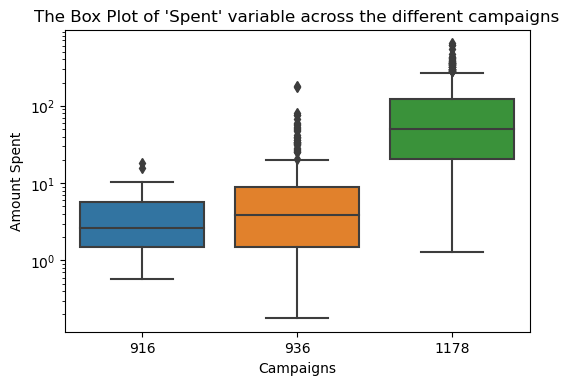

In [145]:
plt.figure(dpi = 100)
sns.boxplot(y = df['spent'], x = df['xyzCampId'])
plt.xlabel("Campaigns")
plt.ylabel("Amount Spent")
plt.yscale("log") #changing the y-axis to log scale
plt.title("The Box Plot of 'Spent' variable across the different campaigns")
plt.show()

Looks like the Company spends a lot of money on Campaign 1178. The amount of money spent on the other two campaigns are quiet low. So let's create a dataframe that only contains information about Campaign 1178.

## Analysis of campaign 1178

In [121]:
df1178 = df[df['xyzCampId'] == 1178]
df1178.sort_values(by = 'ROAS', ascending = False).head()

,ad_id,xyzCampId,fbCampId,age,gender,interest,impr,clicks,spent,conv,appConv,ctr,cpc,totConv,costPerConv,totConVal,ROAS
1071,1314330,1178,179897,40-44,M,104,17559,1,1.49,1,1,0.005695,1.490,2,0.74500,105,70.469798
526,1121101,1178,144532,30-34,M,15,29945,1,1.59,2,1,0.003339,1.590,3,0.53000,110,69.182389
589,1121231,1178,144561,30-34,M,32,22256,1,1.66,1,1,0.004493,1.660,2,0.83000,105,63.253013
875,1121839,1178,144663,30-34,F,31,13911,1,1.73,1,1,0.007189,1.730,2,0.86500,105,60.693641
1049,1314297,1178,179864,30-34,M,101,72228,5,7.53,4,4,0.006923,1.506,8,0.94125,420,55.776894


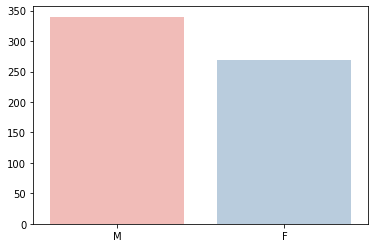

In [125]:
#Distribution of the Gender Variable
gender = df1178['gender'].value_counts()
sns.barplot(x = gender.index, y = gender.values, palette = my_colors );

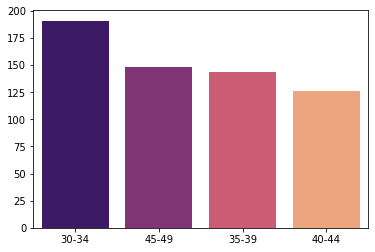

In [126]:
#Distribution of the Age Variable
age = df1178['age'].value_counts()
sns.barplot(x = age.index, y = age.values, palette = 'magma' );

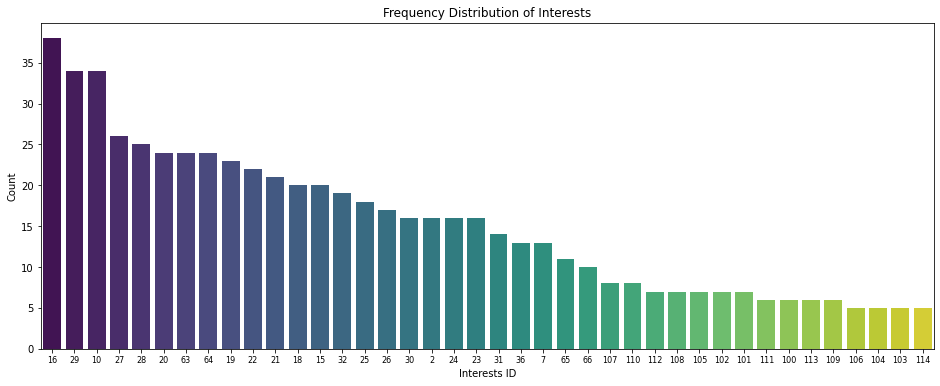

In [129]:
#Distribution of the Interest Variable
interest = df1178['interest'].value_counts().sort_values(ascending = False)
plt.figure(figsize = (16,6))
sns.barplot(x = interest.index, y = interest.values, order = interest.index, palette = 'viridis')
plt.xticks(fontsize = 8, rotation = 0)
plt.xlabel("Interests ID")
plt.ylabel("Count")
plt.title("Frequency Distribution of Interests");

#### Next, we'll see how the total number and value of conversions change with change in 'spent' varible.

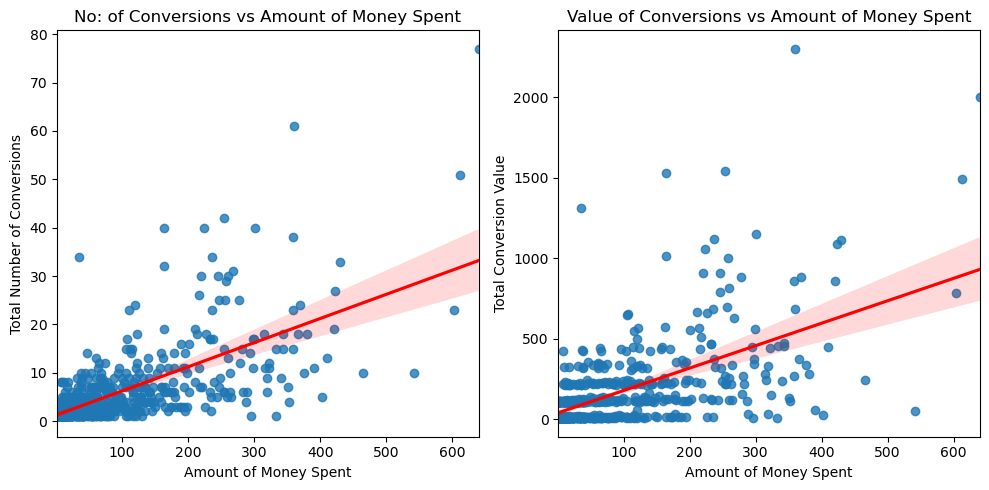

In [143]:
plt.figure(dpi = 100, figsize = (10,5))
plt.subplot(1,2,1)
sns.regplot(x = 'spent', y = 'totConv', data = df1178, line_kws = {'color' : 'red'})
plt.ylabel('Total Number of Conversions')
plt.title('No: of Conversions vs Amount of Money Spent')
plt.xlabel("Amount of Money Spent")

plt.subplot(1,2,2)
sns.regplot(x = 'spent', y = 'totConVal', data = df1178, line_kws = {'color' : 'red'})
plt.ylabel("Total Conversion Value")
plt.title("Value of Conversions vs Amount of Money Spent")
plt.xlabel("Amount of Money Spent")

plt.tight_layout()

From the above graphs, it looks like as we spend more money, we generate more conversions both in number and in revenue. However, the datapoints towards the right side of the graphs are sparse, so there is a chance that this relationship could be purely due to luck.

Let's use the demographic variables ('Age', 'Interests' and 'Gender') to split apart our data and conduct further analysis before making any recommendations.

Let's see whether there is a difference in the relationship between the two genders and the ROAS

#### Splitting by Gender

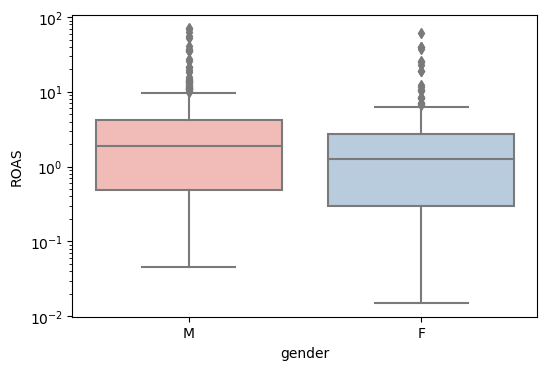

In [151]:
#The boxplot for ROAS w.r.t gender
plt.figure(dpi = 100)
sns.boxplot(y = df1178['ROAS'], x = df1178['gender'], palette = my_colors)
plt.yscale('log')

#### Looks like the distribution of ROAS for the two genders are slightly different. But is this a statistically significant difference?

#### Hypothesis Testing


In [152]:
male = df1178[df1178['gender']=='M']['ROAS']
female = df1178[df1178['gender']=='F']['ROAS']

Skewness of data is:  -0.13009248186040387
Kurtosis of data is:  -0.3578721943787624
NormaltestResult(statistic=6.086369838216067, pvalue=0.04768278159487333)


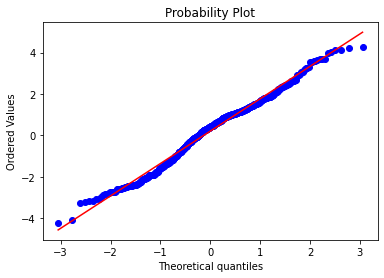

In [163]:
#importing library
from scipy import stats

# Determing normality of ROAS
print("Skewness of data is: ", stats.skew(np.log(df1178['ROAS'])))
print("Kurtosis of data is: ", stats.kurtosis(np.log(df1178['ROAS'])))

print(stats.mstats.normaltest(np.log(df1178['ROAS'])))

stats.probplot(np.log(df1178['ROAS']), fit = True, plot = plt);

#### Note: Applying log transformation to ROAS makes it normal. We normalize the data so that we can apply the Independent Sample T-Test

In [164]:
#applying log transformation to the two samples
male10 = np.log(male)
female10 = np.log(female)

In [165]:
#applying independent sample t-test
#NUll Hypothesis: There is no significant difference between male & female w.r.t ROAS
from scipy import stats
stats.ttest_ind(male10, female10)

Ttest_indResult(statistic=3.993458178166923, pvalue=7.309967168228865e-05)

#### Since the p-value < 0.05, we reject the Null Hypothesis.Therefore there IS a significant difference between Male and Female w.r.t ROAS

Next, let's summarize the ROAS variable across the gender dimension using mean and median

In [167]:
df1178

,ad_id,xyzCampId,fbCampId,age,gender,interest,impr,clicks,spent,conv,appConv,ctr,cpc,totConv,costPerConv,totConVal,ROAS
518,1121091,1178,144531,30-34,M,10,1194718,141,254.049996,28,14,0.011802,1.801773,42,6.048809,1540,6.061799
519,1121092,1178,144531,30-34,M,10,637648,67,122.400000,13,5,0.010507,1.826866,18,6.800000,565,4.616013
521,1121095,1178,144531,30-34,M,10,459690,50,86.330001,5,2,0.010877,1.726600,7,12.332857,225,2.606278
522,1121096,1178,144531,30-34,M,10,750060,86,161.909999,11,2,0.011466,1.882674,13,12.454615,255,1.574949
523,1121097,1178,144532,30-34,M,15,30068,1,1.820000,1,0,0.003326,1.820000,1,1.820000,5,2.747253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.022305,1.421389,15,23.879333,265,0.739831
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.018822,1.449000,3,57.960001,15,0.086266
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.018478,1.438929,2,20.145000,10,0.248201
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.017083,1.471926,10,19.871000,240,1.207790


In [169]:
df1178.groupby('gender')['ROAS'].agg([np.median, np.mean])

,median,mean
gender,,
F,1.257636,2.850610
M,1.886641,4.517818


#### ROAS differences by gender are significant and depending on the profit margins involved, could make the difference between the campaign being profitable or not.

Next, let's split the data apart by interests and see how the ROAS values changes.

#### Splitting by Interests

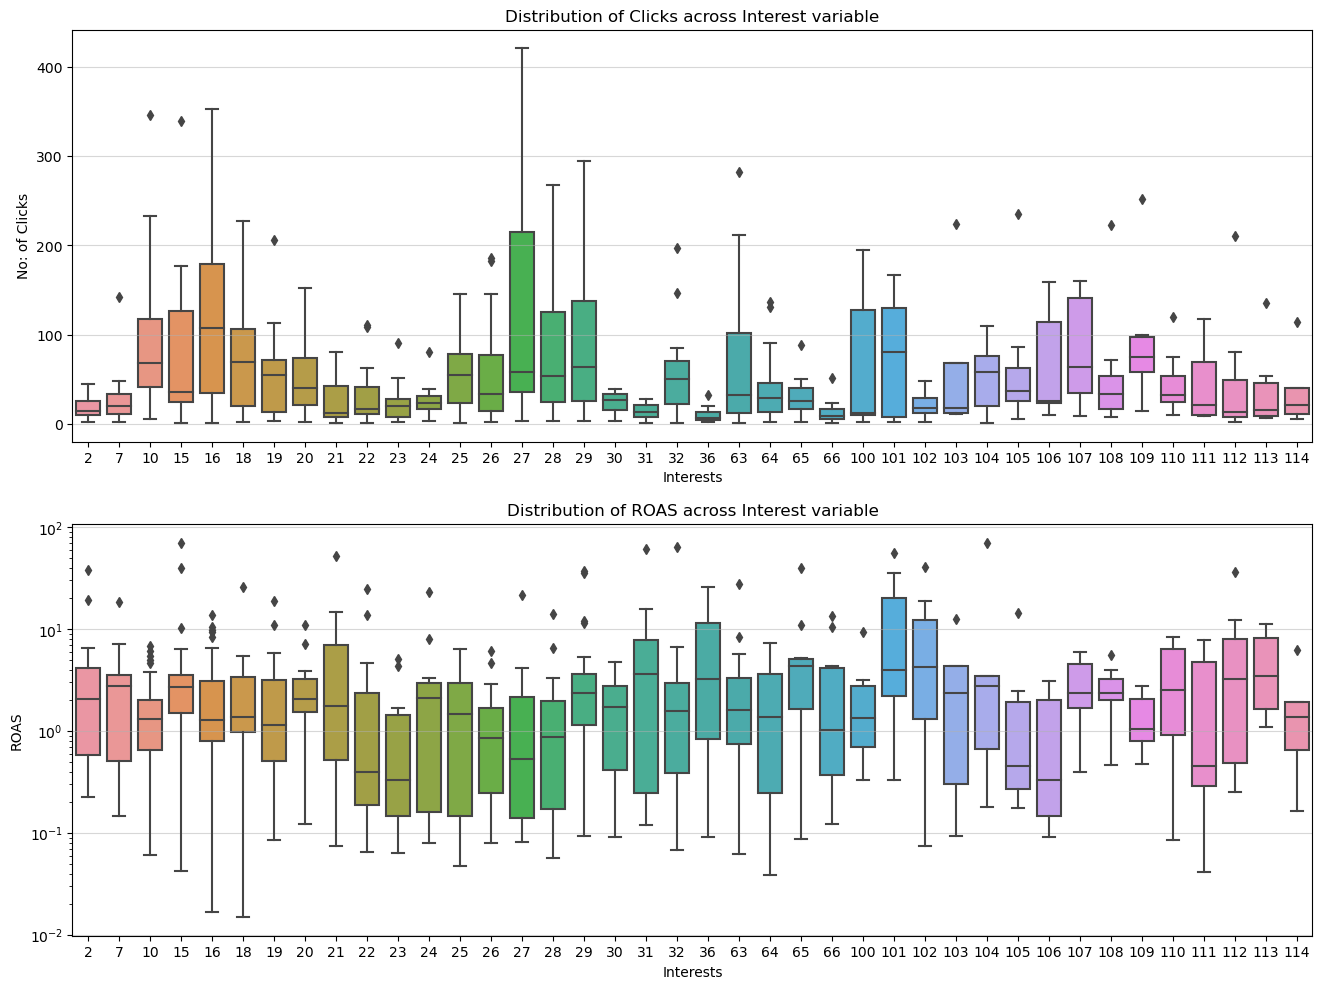

In [177]:
plt.figure(dpi = 100, figsize = (16,12))

plt.subplot(2,1,1)
sns.boxplot(y = df1178['clicks'], x = df1178['interest'])
plt.grid(axis = 'y', alpha = 0.5)
plt.ylabel("No: of Clicks")
plt.xlabel("Interests")
plt.title("Distribution of Clicks across Interest variable")

plt.subplot(2,1,2)
sns.boxplot(y = df1178['ROAS'], x = df1178['interest'])
plt.yscale("log") #changing the y-axis scale
plt.grid(axis = 'y', alpha = 0.5)
plt.ylabel("ROAS")
plt.xlabel("Interests")
plt.title("Distribution of ROAS across Interest variable")

plt.show()

#### We can see that our different Interest groups are performing differently. Let's Calculate the Mean and Median ROAS values across different Interest groups

In [179]:
#Top 10 Interests by Mean ROAS
df1178.groupby('interest').agg({'ROAS': ['mean', 'median'],
                                'clicks': 'sum'}).sort_values(by = ('ROAS', 'mean'), 
                                                              ascending = False).head(10)

ROAS           clicks
               mean    median    sum
interest                            
104       15.514689  2.753204    265
101       14.953680  3.958480    524
102       10.356094  4.271845    150
31         8.260249  3.640244    189
112        8.059562  3.214573    339
15         7.889540  2.685470   1554
36         7.379306  3.213555    126
65         6.995963  4.380476    343
21         6.344740  1.772478    493
2          5.409576  2.079227    306

Above, we can see some 'interests' with a good ROAS as well as a healthy number of clicks. Let's choose interests 101, 15 and 21 & investigate a little further by breaking them apart by gender.

In [180]:
df1 = df1178.groupby('interest').agg({'ROAS': ['mean', 'median'],
                                'clicks': 'sum'}).sort_values(by = ('ROAS', 'mean'), 
                                                              ascending = False).head(10)

In [199]:
df1.sort_values(by = ('clicks', 'sum'), ascending = False)

ROAS           clicks
               mean    median    sum
interest                            
15         7.889540  2.685470   1554
101       14.953680  3.958480    524
21         6.344740  1.772478    493
65         6.995963  4.380476    343
112        8.059562  3.214573    339
2          5.409576  2.079227    306
104       15.514689  2.753204    265
31         8.260249  3.640244    189
102       10.356094  4.271845    150
36         7.379306  3.213555    126

Now, we will choose three interests: 15, 101 and 21, which has both a healthy ROAS and No: of Clicks!

In [200]:
df_int_gen = df1178[df1178['interest'].isin([101, 15, 21])].copy()

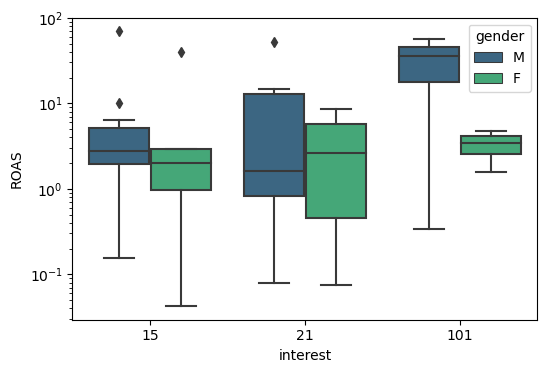

In [203]:
plt.figure(dpi = 100)
sns.boxplot(y = df_int_gen['ROAS'], x = df_int_gen['interest'],
            hue = df['gender'], palette = 'viridis')
plt.yscale("log")

In [205]:
#Grouping the dataset with both Interest and Gender and
#sorting by Mean of ROAS in descending order
df_int_gen.groupby(['interest', 'gender']).agg({'ROAS': ['mean', 'median'],
                                                              'clicks': 'sum'}).sort_values(by = ('ROAS', 'mean'), ascending = False)

ROAS            clicks
                      mean     median    sum
interest gender                             
101      M       30.528030  35.472973     17
21       M        9.627208   1.623041    200
15       M        8.893790   2.787577    827
         F        6.383166   1.980670    727
21       F        3.360678   2.603242    293
101      F        3.272918   3.402840    507

It looks Male audience members are resulting in High ROAS for all three interest groups. At this point it makes a lot of sense to increase the ad spend for Males with 101 as Interest group. However, we need to keep in mind that no: of clicks for this particular combination of gender and interest is very small. 

But Overall it's the men that seem to be bringing in a lot of revenue w.r.t to ad money spend on them. 

Let's drill down even further and see which Age Group has highest ROAS. We will subset the data for interests 21 & 15(relatively higher no: of clicks) and Men.

In [214]:
df_int_gen_age = df1178[(df1178['interest'].isin([15, 21])) & (df1178['gender'] == 'M')].copy()

In [215]:
df_int_gen_age.head()

,ad_id,xyzCampId,fbCampId,age,gender,interest,impr,clicks,spent,conv,appConv,ctr,cpc,totConv,costPerConv,totConVal,ROAS
523,1121097,1178,144532,30-34,M,15,30068,1,1.820000,1,0,0.003326,1.820000,1,1.820000,5,2.747253
524,1121098,1178,144532,30-34,M,15,1267550,123,236.769999,24,10,0.009704,1.924959,34,6.963823,1120,4.730329
525,1121100,1178,144532,30-34,M,15,3052003,340,639.949998,60,17,0.011140,1.882206,77,8.311039,2000,3.125244
526,1121101,1178,144532,30-34,M,15,29945,1,1.590000,2,1,0.003339,1.590000,3,0.530000,110,69.182389
527,1121102,1178,144532,30-34,M,15,357856,30,52.970000,7,3,0.008383,1.765667,10,5.297000,335,6.324335


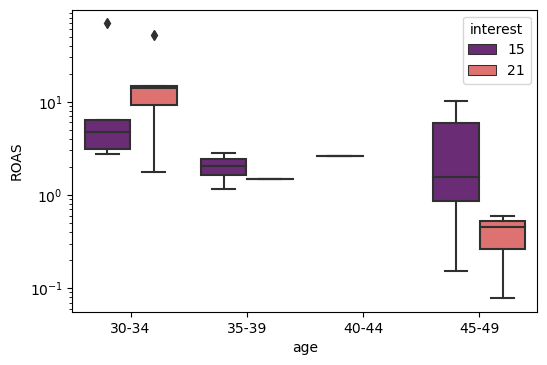

In [217]:
plt.figure(dpi = 100)
sns.boxplot(x = df_int_gen_age['age'], y = df_int_gen_age['ROAS'], hue = df_int_gen_age['interest'],
            palette = 'magma')
plt.yscale("log");

In [219]:
#Grouping the data by age and interest and then
#summarizing using median & mean for ROAS and sum for Clicks
df_int_gen_age.groupby(['age', 'interest']).agg({'ROAS':['median', 'mean'],
                                     'clicks': 'sum'}).sort_values(by = ('ROAS', 'mean'),
                                                                   ascending = False)

ROAS            clicks
                   median       mean    sum
age   interest                             
30-34 21        13.924051  18.439987     58
      15         4.730329  17.221910    495
45-49 15         1.570681   3.976298    138
40-44 15         2.623688   2.623688     26
35-39 15         2.069225   2.021118    168
      21         1.472096   1.472096     44
45-49 21         0.450045   0.375985     98

Looks like the **30-34** age group is giving us a good ROAS value. So it makes sense to invest in Males from this age group with Interests 21 & 15.

## Recommendations to Increase Conversion

1. Increase spend on advertisements targetting **Men** in general. 

2. Increase spend on advertisements targetting **Interest groups 15, 101, 21, 65 and 112**. These groups have exhibhited a healthy ROAS and No: of Clicks.

3. Increase spend on advertisements targetting Age Group **30-34**, especially the Men in this group with interest groups 15 & 21.

### Export Data as Excel File to build a Dashboard with Tableau

In [220]:
df

,ad_id,xyzCampId,fbCampId,age,gender,interest,impr,clicks,spent,conv,appConv,ctr,cpc,totConv,costPerConv,totConVal,ROAS
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.013605,1.430000,3,0.476667,110,76.923080
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.011198,0.910000,2,0.910000,10,5.494505
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.023480,1.250000,1,1.250000,5,4.000000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.024195,1.290000,2,0.645000,105,81.395351
6,708889,916,103940,30-34,M,15,15615,3,4.770000,1,0,0.019212,1.590000,1,4.770000,5,1.048218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.022305,1.421389,15,23.879333,265,0.739831
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.018822,1.449000,3,57.960001,15,0.086266
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.018478,1.438929,2,20.145000,10,0.248201
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.017083,1.471926,10,19.871000,240,1.207790


In [222]:
df.rename(columns = {'impr': 'impressions'}, inplace = True)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 1142
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ad_id        931 non-null    int64  
 1   xyzCampId    931 non-null    int64  
 2   fbCampId     931 non-null    int64  
 3   age          931 non-null    object 
 4   gender       931 non-null    object 
 5   interest     931 non-null    int64  
 6   impressions  931 non-null    int64  
 7   clicks       931 non-null    int64  
 8   spent        931 non-null    float64
 9   conv         931 non-null    int64  
 10  appConv      931 non-null    int64  
 11  ctr          931 non-null    float64
 12  cpc          931 non-null    float64
 13  totConv      931 non-null    int64  
 14  costPerConv  931 non-null    float64
 15  totConVal    931 non-null    int64  
 16  ROAS         931 non-null    float64
dtypes: float64(5), int64(10), object(2)
memory usage: 163.2+ KB


In [224]:
tableau = df[['ad_id', 'xyzCampId', 'fbCampId', 'age', 'gender', 'interest', 'impressions',
       'clicks', 'spent', 'conv', 'appConv']]
tableau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ad_id        931 non-null    int64  
 1   xyzCampId    931 non-null    int64  
 2   fbCampId     931 non-null    int64  
 3   age          931 non-null    object 
 4   gender       931 non-null    object 
 5   interest     931 non-null    int64  
 6   impressions  931 non-null    int64  
 7   clicks       931 non-null    int64  
 8   spent        931 non-null    float64
 9   conv         931 non-null    int64  
 10  appConv      931 non-null    int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 119.6+ KB


In [225]:
tableau.to_excel('tableau.xlsx', index = False)

In [226]:
d = pd.read_excel('tableau.xlsx')
d

,ad_id,xyzCampId,fbCampId,age,gender,interest,impressions,clicks,spent,conv,appConv
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
3,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
4,708889,916,103940,30-34,M,15,15615,3,4.770000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
926,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
927,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
928,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
929,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


### Tableau Dashboard

[facebook Campaigns Dashboard](https://public.tableau.com/views/FacebookCampaignAnalysis_16380391897920/facebookCampaignsDashboard?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)